# Imports

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn import metrics

import time
from contextlib import contextmanager
import gc
import warnings
import pprint
from IPython.display import clear_output

# Configuration

In [2]:
RANDOM_STATE= 190276
ROOT_INPUT = './data/work/'

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
sns.set()
pd.set_option('display.max_columns', 122)

# Fonctions

In [3]:
# Time tracking
@contextmanager
def timer(title: str):
    t0 = time.time()
    yield
    print("{} - éxécuté en {:.0f}s".format(title, time.time() - t0))

def scale(df: pd.DataFrame) -> pd.DataFrame:
    scaler = preprocessing.StandardScaler()
    columns = df.columns
    index = df.index
    df_scaled = scaler.fit_transform(df)
    
    df_scaled = pd.DataFrame(df_scaled, columns=columns, index=index)
    
    return df_scaled

# Load DataFrame

In [4]:
df = pd.read_pickle(ROOT_INPUT + 'olist_group_by_customer_unique_id.pickle')
df

,orders_count,customer_geolocation_lat_mean,customer_geolocation_lat_count,customer_geolocation_lat_most_frequent,customer_geolocation_lng_mean,customer_geolocation_lng_count,customer_geolocation_lng_most_frequent,order_purchase_timestamp_min,order_purchase_timestamp_max,products_count_min,products_count_max,product_count_mean,seller_count_min,seller_count_max,seller_count_mean,price_item_min,price_item_max,total_orders_price,mean_orders_price,total_freight_value,mean_freight_value,seller_geolocation_lat_mean,seller_geolocation_lng_mean,product_name_lenght_mean,product_description_lenght_mean,product_photos_qty_mean,order_weight_mean,order_length_mean,order_height_mean,order_width_mean,payment_sequential_mean,payment_installments_mean,payment_value_sum,review_score_min,review_score_max,review_score_mean,purchase_days_from_today_min,purchase_days_from_today_max,purchase_days_from_today_mean,cat_agro_industria_e_comercio_count,cat_alimentos_count,cat_alimentos_bebidas_count,cat_artes_count,cat_artes_e_artesanato_count,cat_artigos_de_festas_count,cat_artigos_de_natal_count,cat_audio_count,cat_automotivo_count,cat_bebes_count,cat_bebidas_count,cat_beleza_saude_count,cat_brinquedos_count,cat_cama_mesa_banho_count,cat_casa_conforto_count,cat_casa_conforto_2_count,cat_casa_construcao_count,cat_cds_dvds_musicais_count,cat_cine_foto_count,cat_climatizacao_count,cat_consoles_games_count,cat_construcao_ferramentas_construcao_count,...,cat_market_place_count,cat_moveis_colchao_e_estofado_count,cat_moveis_cozinha_area_de_servico_jantar_e_jardim_count,cat_moveis_decoracao_count,cat_moveis_escritorio_count,cat_moveis_quarto_count,cat_moveis_sala_count,cat_musica_count,cat_papelaria_count,cat_pc_gamer_count,cat_pcs_count,cat_perfumaria_count,cat_pet_shop_count,cat_portateis_casa_forno_e_cafe_count,cat_portateis_cozinha_e_preparadores_de_alimentos_count,cat_relogios_presentes_count,cat_seguros_e_servicos_count,cat_sinalizacao_e_seguranca_count,cat_tablets_impressao_imagem_count,cat_telefonia_count,cat_telefonia_fixa_count,cat_utilidades_domesticas_count,payment_type_boleto_count,payment_type_credit_card_count,payment_type_debit_card_count,payment_type_not_defined_count,payment_type_voucher_count,order_status_approved_count,order_status_canceled_count,order_status_created_count,order_status_delivered_count,order_status_invoiced_count,order_status_processing_count,order_status_shipped_count,order_status_unavailable_count,purchase_year_2016_count,purchase_year_2017_count,purchase_year_2018_count,purchase_month_1_count,purchase_month_2_count,purchase_month_3_count,purchase_month_4_count,purchase_month_5_count,purchase_month_6_count,purchase_month_7_count,purchase_month_8_count,purchase_month_9_count,purchase_month_10_count,purchase_month_11_count,purchase_month_12_count,purchase_quarter_1_count,purchase_quarter_2_count,purchase_quarter_3_count,purchase_quarter_4_count,purchase_day_of_week_0_count,purchase_day_of_week_1_count,purchase_day_of_week_2_count,purchase_day_of_week_3_count,purchase_day_of_week_4_count,purchase_day_of_week_5_count,purchase_day_of_week_6_count
customer_unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1,-23.337679,1,-23.337679,-46.826739,1,-46.826739,2018-05-10 10:56:27,2018-05-10 10:56:27,1.0,1.0,1.0,1.0,1.0,1.0,129.90,129.90,129.90,129.90,12.00,12.00,-22.709287,-47.665206,60.0,236.0,1.0,1500.0,34.0,7.0,32.0,1.0,8.0,141.90,5.0,5.0,5.0,1928,1928,1928.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
0000b849f77a49e4a4ce2b2a4ca5be3f,1,-23.557876,1,-23.557876,-46.788754,1,-46.788754,2018-05-07 11:11:27,2018-05-07 11:11:27,1.0,1.0,1.0,1.0,1.0,1.0,18.90,18.90,18.90,18.90,8.29,8.29,-23.490680,-46.58

# Normalisation du jeu de données

In [5]:
df = scale(df.select_dtypes('number'))

In [6]:
df.describe().loc[['mean', 'std'], :].round(2)

,orders_count,customer_geolocation_lat_mean,customer_geolocation_lat_count,customer_geolocation_lat_most_frequent,customer_geolocation_lng_mean,customer_geolocation_lng_count,customer_geolocation_lng_most_frequent,products_count_min,products_count_max,product_count_mean,seller_count_min,seller_count_max,seller_count_mean,price_item_min,price_item_max,total_orders_price,mean_orders_price,total_freight_value,mean_freight_value,seller_geolocation_lat_mean,seller_geolocation_lng_mean,product_name_lenght_mean,product_description_lenght_mean,product_photos_qty_mean,order_weight_mean,order_length_mean,order_height_mean,order_width_mean,payment_sequential_mean,payment_installments_mean,payment_value_sum,review_score_min,review_score_max,review_score_mean,purchase_days_from_today_min,purchase_days_from_today_max,purchase_days_from_today_mean,cat_agro_industria_e_comercio_count,cat_alimentos_count,cat_alimentos_bebidas_count,cat_artes_count,cat_artes_e_artesanato_count,cat_artigos_de_festas_count,cat_artigos_de_natal_count,cat_audio_count,cat_automotivo_count,cat_bebes_count,cat_bebidas_count,cat_beleza_saude_count,cat_brinquedos_count,cat_cama_mesa_banho_count,cat_casa_conforto_count,cat_casa_conforto_2_count,cat_casa_construcao_count,cat_cds_dvds_musicais_count,cat_cine_foto_count,cat_climatizacao_count,cat_consoles_games_count,cat_construcao_ferramentas_construcao_count,cat_construcao_ferramentas_ferramentas_count,cat_construcao_ferramentas_iluminacao_count,...,cat_market_place_count,cat_moveis_colchao_e_estofado_count,cat_moveis_cozinha_area_de_servico_jantar_e_jardim_count,cat_moveis_decoracao_count,cat_moveis_escritorio_count,cat_moveis_quarto_count,cat_moveis_sala_count,cat_musica_count,cat_papelaria_count,cat_pc_gamer_count,cat_pcs_count,cat_perfumaria_count,cat_pet_shop_count,cat_portateis_casa_forno_e_cafe_count,cat_portateis_cozinha_e_preparadores_de_alimentos_count,cat_relogios_presentes_count,cat_seguros_e_servicos_count,cat_sinalizacao_e_seguranca_count,cat_tablets_impressao_imagem_count,cat_telefonia_count,cat_telefonia_fixa_count,cat_utilidades_domesticas_count,payment_type_boleto_count,payment_type_credit_card_count,payment_type_debit_card_count,payment_type_not_defined_count,payment_type_voucher_count,order_status_approved_count,order_status_canceled_count,order_status_created_count,order_status_delivered_count,order_status_invoiced_count,order_status_processing_count,order_status_shipped_count,order_status_unavailable_count,purchase_year_2016_count,purchase_year_2017_count,purchase_year_2018_count,purchase_month_1_count,purchase_month_2_count,purchase_month_3_count,purchase_month_4_count,purchase_month_5_count,purchase_month_6_count,purchase_month_7_count,purchase_month_8_count,purchase_month_9_count,purchase_month_10_count,purchase_month_11_count,purchase_month_12_count,purchase_quarter_1_count,purchase_quarter_2_count,purchase_quarter_3_count,purchase_quarter_4_count,purchase_day_of_week_0_count,purchase_day_of_week_1_count,purchase_day_of_week_2_count,purchase_day_of_week_3_count,purchase_day_of_week_4_count,purchase_day_of_week_5_count,purchase_day_of_week_6_count
mean,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,...,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,

# Test Clustering

## Kmeans

In [27]:
from sklearn.cluster import KMeans
X = df.values

silhouette = pd.DataFrame()

for n_clusters in range(2,10,1):
    for i in range(5):
        kmeans = KMeans(n_clusters=n_clusters)
        kmeans.fit(X)
        silhouette.loc[n_clusters, f'test {i+1}'] = metrics.silhouette_score(X=X, labels=kmeans.labels_, sample_size=1000)
silhouette['mean'] = silhouette.mean(axis=1)
silhouette['std'] = silhouette.std(axis=1)

silhouette

,test 1,test 2,test 3,test 4,test 5,mean,std
2,0.054045,0.054786,0.054362,0.053912,0.057288,0.054879,0.001242
3,0.048900,0.053902,0.047442,0.051660,0.050300,0.050441,0.002230
4,0.045792,0.050596,0.066649,0.039599,0.046210,0.049769,0.009138
5,0.046971,0.020017,0.030290,0.029083,0.031457,0.031564,0.008701
6,0.005476,0.036736,0.020595,0.018931,0.032089,0.022765,0.010958
7,0.020069,0.000808,0.037097,0.004122,0.038310,0.020081,0.015799
8,0.020524,0.020132,0.026082,0.022222,0.045209,0.026834,0.009426
9,0.022203,0.018193,0.028553,0.031756,0.024035,0.024948,0.004761


<Axes: >

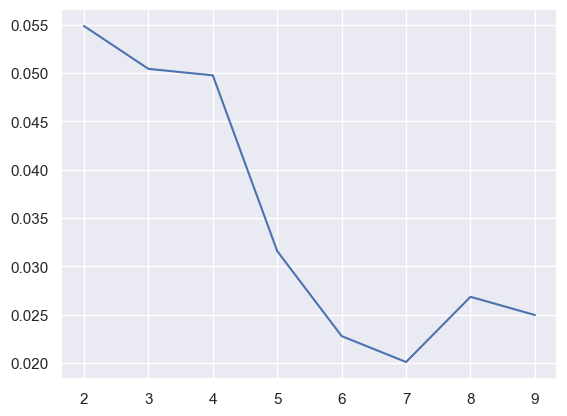

In [34]:
silhouette['mean'].plot()

## DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

X = df.values
result = []

for min_sample in range(2, 21, 1):
    for eps in np.arange(0.5, 50.1, 0.1):
        print(f'In progress: min_sample {min_sample} eps {eps}')
        dbscan = DBSCAN(eps=eps, min_samples=min_sample, n_jobs=-1)
        dbscan.fit(X)

        labels = dbscan.labels_
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)

        df_db = df.copy()
        df_db['label'] = labels

        df_no_noise = df_db[df_db['label'] != -1]
        X_no_noise = df_no_noise.drop(['label'], axis=1).values
        labels_no_noise = df_no_noise['label'].values
        result.append([min_sample, 
                  eps, 
                  n_clusters_, 
                  n_noise_, 
                  metrics.silhouette_score(X=X_no_noise, labels=labels_no_noise, sample_size=1000)])


result = pd.DataFrame(result)
result.columns = ['min_sample', 'eps', 'n_clusters', 'n_noise', 'silouhette']
result

In progress: min_sample 2 eps 0.5
In progress: min_sample 2 eps 0.6


# Projection

## Test PCA

In [6]:
df.dtypes.value_counts()

float64           110
int64              39
datetime64[ns]      2
Name: count, dtype: int64

In [7]:
df_pca = df.select_dtypes(['number'])
df_pca = scale(df_pca)
pca_columns = df_pca.columns.to_list()

In [8]:
from sklearn import decomposition
PCA = decomposition.PCA(n_components=df_pca.shape[1])
PCA.fit(df_pca.values)

PCA(n_components=149)

Text(0.5, 1.0, '')

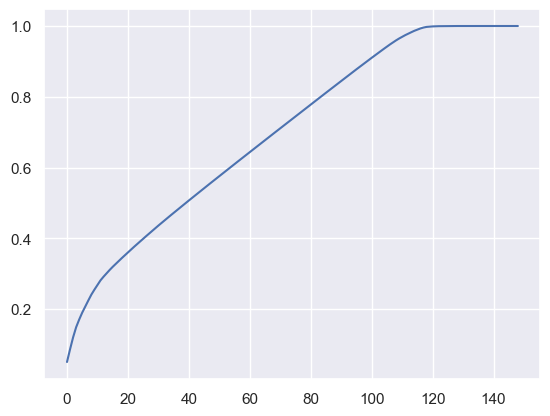

In [9]:
pd.Series(PCA.explained_variance_ratio_).cumsum().plot()
plt.title('')

In [15]:
print(f'Explication de la variance sur les 2 premiers axes = {(PCA.explained_variance_ratio_[0] + PCA.explained_variance_ratio_[1])*100:.2f}%')

Explication de la variance sur les 2 premiers axes = 8.65%


In [16]:
print(f'Explication de la variance sur les 3 premiers axes = {(PCA.explained_variance_ratio_[0] + PCA.explained_variance_ratio_[1] + PCA.explained_variance_ratio_[2])*100:.2f}%')

Explication de la variance sur les 3 premiers axes = 12.03%


La PCA est inneficace pour projeter les données sur 2 ou 3 axes. La variance exprimée dans ce cas est trop faible, le jeu de données est mal représenté

## Test T-SNE